# Кинопрокат
Таблица `mkrf_movies` содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений. 

- `title` — название фильма;
- `puNumber` — номер прокатного удостоверения;
- `show_start_date` — дата премьеры фильма;
- `type` — тип фильма;
- `film_studio` — студия-производитель;
- `production_country` — страна-производитель;
- `director` — режиссёр;
- `producer` — продюсер;
- `age_restriction` — возрастная категория;
- `refundable_support` *—* объём возвратных средств государственной поддержки;
- `nonrefundable_support` *—* объём невозвратных средств государственной поддержки;
- `financing_source` *—* источник государственного финансирования;
- `budget` *—* общий бюджет фильма;
- `ratings` *—* рейтинг фильма на КиноПоиске;
- `genres` *—* жанр фильма.

Обратите внимание, что столбец `budget` **уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку. 

Таблица `mkrf_shows` содержит сведения о показах фильмов в российских кинотеатрах.

- `puNumber` — номер прокатного удостоверения;
- `box_office` — сборы в рублях.

# Задание № 0

С помощью библиотеки pandas (импортирована под алиасом pd)
* прочитайте данные из csv-файлов mkrf_movies.csv и mkrf_shows
* запишите датафреймы в переменные movies_df и shows_df соответственно

In [1]:
import pandas as pd

movies_df = pd.read_csv("mkrf_movies.csv")
shows_df = pd.read_csv("mkrf_shows.csv")

# Задание № 1

### Опишите проблемы типов имеющихся данных и варианты исправления

### Исследуйте дубликаты и пропуски. Какова их природа в этом наборе данных? Можно ли это исправить?

Использовать методы
* duplicated и/или смежные (drop_duplicates)
* isna() и/или смежные

Ссылки:

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html


Что может ещё понадобиться:

* Преобразование к численным типам данных. Для этого можно
    * воспользоваться методом **to_numeric**, аналогичным **to_datetime**, в связке с методом **apply**
    * воспользоваться методом astype('int64')
* Сброс данных (drop)
    
Ссылки:

https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html#pandas.DataFrame.astype

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html

In [2]:
movies_df.drop_duplicates(inplace=True)
shows_df.drop_duplicates(inplace=True)

In [3]:
movies_df.isna().sum().reset_index(name="nan count")


,index,nan count
0,title,0
1,puNumber,0
2,show_start_date,0
3,type,0
4,film_studio,18
5,production_country,2
6,director,9
7,producer,568
8,age_restriction,0
9,refundable_support,7154


In [4]:
shows_df.isna().sum().reset_index(name="nan count")

,index,nan count
0,puNumber,0
1,box_office,0


In [5]:
movies_df[~movies_df["puNumber"].str.isdigit()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
804,Паранормальный Якутск,111004112,2012-08-24T12:00:00.000Z,Художественный,ИП Тимофеев К.П.,Россия,К.Тимофеев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
movies_df.drop(1797, axis=0, inplace=True)
movies_df["puNumber"] = movies_df["puNumber"].astype("int64")
movies_df["show_start_date"] = pd.to_datetime(
    movies_df["show_start_date"], format="ISO8601"
)

In [7]:
duplicated_pu_list = movies_df[movies_df["puNumber"].duplicated()]["puNumber"].tolist()
movies_df[movies_df["puNumber"].astype(object).apply(lambda x: x in duplicated_pu_list)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия"
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история"
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал"
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал"


In [8]:
movies_df[["refundable_support", "nonrefundable_support", "budget"]] = movies_df[
    ["refundable_support", "nonrefundable_support", "budget"]
].fillna(0)

In [9]:
merged_df = movies_df.merge(shows_df, left_on="puNumber", right_on="puNumber")

In [10]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  3158 non-null   object             
 1   puNumber               3158 non-null   int64              
 2   show_start_date        3158 non-null   datetime64[ns, UTC]
 3   type                   3158 non-null   object             
 4   film_studio            3157 non-null   object             
 5   production_country     3157 non-null   object             
 6   director               3157 non-null   object             
 7   producer               3042 non-null   object             
 8   age_restriction        3158 non-null   object             
 9   refundable_support     3158 non-null   float64            
 10  nonrefundable_support  3158 non-null   float64            
 11  budget                 3158 non-null   float64          

In [11]:
merged_df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,0.0,0.0,0.0,NaN,8.3,"мелодрама,комедия",2700.0
1,Неподдающиеся,111003616,2016-02-12 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Ю.Чулюкин,NaN,«6+» - для детей старше 6 лет,0.0,0.0,0.0,NaN,8.0,"мелодрама,комедия",360.0
2,Неподсуден,111003716,2016-02-12 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"В.Краснопольский, В.Усков",NaN,«6+» - для детей старше 6 лет,0.0,0.0,0.0,NaN,7.7,драма,420.0
3,"Операция ""Ы"" и другие приключения Шурика",111007413,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Л.Гайдай,NaN,«6+» - для детей старше 6 лет,0.0,0.0,0.0,NaN,8.7,"комедия,мелодрама,криминал",380.0
4,Мужики!..,111007213,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,И.Бабич,NaN,«6+» - для детей старше 6 лет,0.0,0.0,0.0,NaN,8.1,драма,1165.0


# Задание № 2

### Посчитайте динамику сборов по годам премьер фильмов. В каком году медианная сумма сборов была максимальной?

**Было бы здорово визуализировать результаты!**

Что может понадобиться:

* Сортировки данных методом **sort_values** (с обязательных указанием по какому индексу или столбцу)
* Удаление дубликатов методом **drop_duplicates**
* Слияние или объединение DataFrame или Series методами **merge** и **join** (первого должно хватить)
* Переименование столбка методом **rename**
* **Самое важное**: группировка данных методом **groupby**
    * обратите особое внимание на аргументы by и as_index
    * по сути это операция разбиения данных, применения некоторой функции и объединение результатов
    * примеры использтвания будут в смежном файле

Ссылки:

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html



# Задание № 3

### С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

**Было бы здорово визуализировать результаты!**

Что может понадобиться:
* См. Задание № 2

In [12]:
merged_df["year"] = merged_df["show_start_date"].dt.year
sum_per_year = merged_df.groupby("year").agg(sum=("box_office", "sum"))
sum_per_year

,sum
year,
2010,2.428654e+06
2011,1.410276e+07
2012,6.955423e+06
2013,2.979971e+07
2014,7.444952e+09
2015,3.949737e+10
2016,4.786630e+10
2017,4.856371e+10
2018,4.966840e+10


<Axes: xlabel='year'>

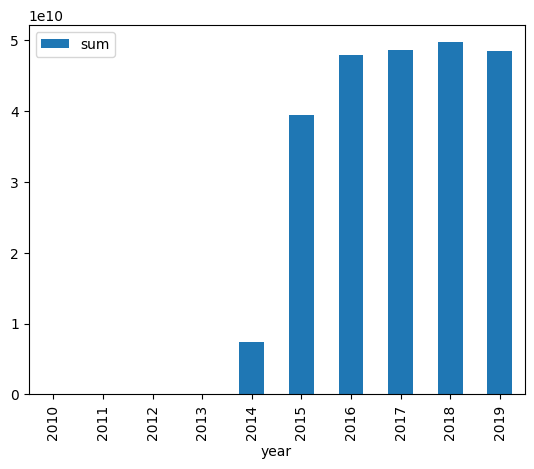

In [13]:
sum_per_year.plot(kind="bar", use_index=True)

In [14]:
median_per_year = merged_df.groupby("year").agg(median=("box_office", "median"))
median_per_year

,median
year,
2010,1700.000
2011,3000.000
2012,5660.000
2013,3522.500
2014,18160.000
2015,4920933.000
2016,3846679.410
2017,9968340.000
2018,8891102.210


<Axes: xlabel='year'>

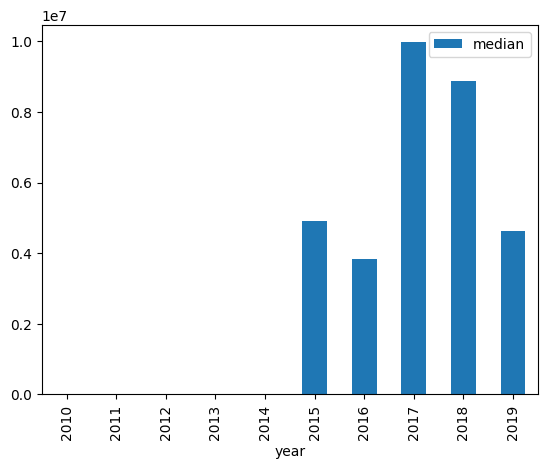

In [15]:
median_per_year.plot(kind="bar")

In [16]:
median_per_year[
    median_per_year["median"] == median_per_year.max().item()
]

,median
year,
2017,9968340.0


# Задание № 4

### Выделите имена продюсеров из столбца producer. У кого из них самый высокий средний рейтинг фильмов?


Что может понадобиться:
* См. Задание № 2

In [17]:
movies_df_cleared = movies_df.dropna(subset=("producer", "ratings"))


def is_float(string):
    return string.replace(".", "").isdigit()


movies_df_cleared = movies_df_cleared[movies_df_cleared["ratings"].apply(is_float)]
movies_df_cleared["ratings"] = movies_df_cleared["ratings"].astype("float64")

In [18]:
def transform(string):
    string = string.strip().lower()
    producers = string.split(",")
    producers_stripped = []
    for i in range(len(producers)):
        producers[i] = producers[i].strip()
        if producers[i]:
            producers_stripped.append(producers[i])
    return producers_stripped


movies_df_cleared["producer"] = (
    movies_df_cleared["producer"].astype(object).apply(transform)
)

In [19]:
movies_df_cleared.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"[дэвид валдес, кевин костнер, джейк эбертс]",«18+» - запрещено для детей,0.0,0.0,0.0,NaN,7.2,"боевик,драма,мелодрама"
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"[джим лемли, джейсон нетер, марк е.платт, яйн ...",«18+» - запрещено для детей,0.0,0.0,0.0,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"[джим лемли, джейсон нетер, марк е.платт, яйн ...",«18+» - запрещено для детей,0.0,0.0,0.0,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"[джим лемли, джейсон нетер, марк е.платт, яйн ...",«18+» - запрещено для детей,0.0,0.0,0.0,NaN,6.8,"фантастика,боевик,триллер"
7,Любовь и сигареты,221074614,2014-12-29 12:00:00+00:00,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"[джон пенотти, джон туртурро]",«18+» - запрещено для детей,0.0,0.0,0.0,NaN,6.6,"мюзикл,мелодрама,комедия"


In [20]:
movies_df_exploded = movies_df_cleared.explode("producer")
group_by_producer = movies_df_exploded.groupby("producer").agg(mean=("ratings", "mean"))
group_by_producer[group_by_producer["mean"] == group_by_producer["mean"].max()]

,mean
producer,
дэвид в.лестер,9.1
ники марвин,9.1


In [21]:
group_by_producer.head(10)

,mean
producer,
"""фонд михаила калатозова""",5.00
а. дж. дикс,6.40
а. калюжный,6.80
а. натахин,6.00
а.а.эшпай,6.70
а.абовян,5.10
а.аболс,6.80
а.агеев,5.25
а.агеев и др.,6.20
